In [57]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [58]:
X,Y = make_circles(n_samples = 500, noise=0.01)

In [59]:
print(X.shape, Y.shape)

(500, 2) (500,)


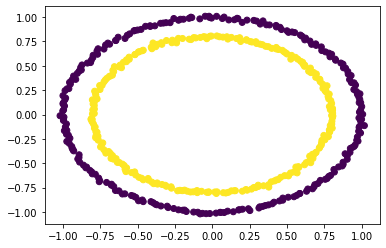

In [60]:
plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()

In [61]:
def phi(X):
    """Non Linear Transformation"""
    
    X1 =X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [62]:
X_ = phi(X)

(500, 3)


In [63]:
def plot3D(X, show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if show==True:
        plt.show()
    return ax

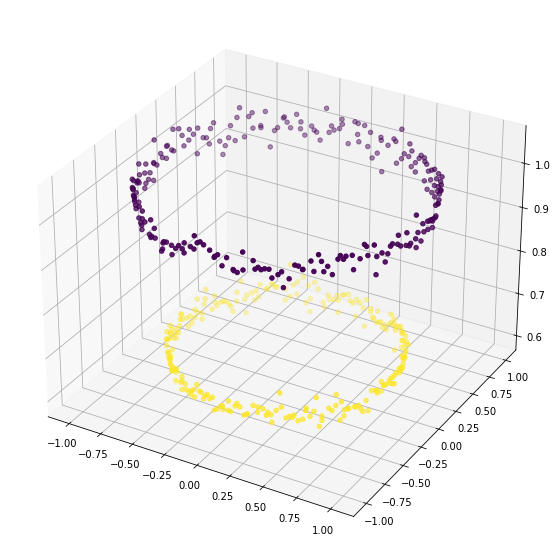

In [64]:
ax = plot3D(X_)

# Logistic Classifier

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [66]:
lr = LogisticRegression()

In [67]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy in 2D data: {}%".format(acc*100))

Accuracy in 2D data: 44.2%


In [68]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy in 3D data: {}%".format(acc*100))

Accuracy in 3D data: 100.0%


# Visualise the decision surface

In [69]:
lr.fit(X_,Y)

LogisticRegression()

In [70]:
weights = lr.coef_

In [71]:
bias = lr.intercept_

In [72]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [76]:
z = -(weights[0,0]*xx+weights[0,1]*yy+bias)/weights[0,2]

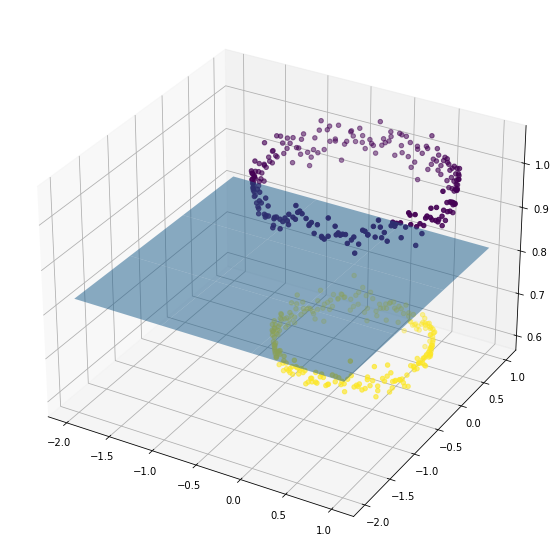

In [77]:
ax = plot3D(X_,False)
ax.plot_surface(xx,yy,z,alpha = 0.5)
plt.show()